# EPAT guided mini project 01- solution


#### Date created: 17/08/2022
#### Created by: EPAT Content

The objective of EPAT guided projects is to give you a flavour of solving a real-world problem using Python.  

Here's what we'll do.

- We will give you the step-wise process to follow so that you understand how to analyze a problem and break it down into steps.
- We will give hints for the difficult steps. You can use them if you get stuck somewhere. This will make sure that you do not spend too much time stranded at a particular step. 
- **We urge you to search for solutions on the internet too. That's what you'll do in the outdoors and we think it is an essential part of learning to program.**
- You can explore alternate ways to solve the problem.
- Guided projects are not graded or reviewed. You need to code the solution and run it successfully to evaluate your own progress.
- We provide a model solution of the project against which you can compare your code for self-review.
- The duration of this project is ONE week. You need to complete the project within that time.


Let's begin!

-----

# **Topic: Monte-Carlo Simulations to compute VAR and Expected Shortfall**

**Problem statement:**
In SFM-03, you have learnt to calculated the Value-at-Risk (VaR) and the expected shortfall for an asset using Monte Carlo simulations in Excel.
In this project, you will be computing the following using Python:
- Historical VaR and cVaR
- Parametric VaR and cVaR
- Monte Carlo VaR and cVaR


----

**Steps to perform for this project:**

1. Import the libraries
2. Download the data
3. Analyze the returns distribution
4. Compute the historical VaR and C-VaR (Expected shortfall)
5. Compute the parametric VaR and C-VaR (Expected shortfall)
6. Scaling the VaR
7. Monte Carlo simulations

### **Section 1: Import the libraries**

Import the libraries with the aliases given in the brackets
 
- yfinance (yf)
- pandas (pd)
- numpy (np)
- matplotlib.pyplot (plt)
- datetime (dt)

In [27]:
# Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [28]:
# Settings the figsize parameter for the plots in this notebook to standardize the size of plots
plt.rcParams["figure.figsize"] = (15, 8)



---



### **Section 2: Analyze the returns distribution**

**Step 1**

In order to calculate returns, you're first going to need stock price data to work with. For this, you will be fetching data from Yahoo Finance using yfinance.

Follow these steps:
1.   Set the parameters for start and end date, and the ticker.
2.   Import the data from Yahoo Finance using the yfinance library.
3.   Print a message saying '< n > number of records downloaded'.



In [29]:
'''
Enter the code for step 1 here
'''
# Set the start and end parameters
end = dt.datetime.now()
start = dt.date(end.year - 4, end.month, end.day)

# Set the ticker
ticker = ['AAPL']

# Import the data
df = yf.download(ticker, start, end)
print(f"{df.shape[0]} rows of data downloaded for the ticker {ticker}.")

[*********************100%***********************]  1 of 1 completed
1007 rows of data downloaded for the ticker ['AAPL'].


**Step 2**

Now that you've downloaded the data, you need to compute the simple daily returns.

Follow these steps:
1. Compute simple returns
2. Check the first five rows of the dataframe.
3. Check the last five rows of the dataframe.

In [30]:
'''
Enter the code for step 2 here
'''
df['daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2020-02-18,78.839996,79.937500,78.652496,79.750000,77.780151,152531200,NaN
2020-02-19,80.000000,81.142502,80.000000,80.904999,78.906624,93984000,0.014483
2020-02-20,80.657501,81.162498,79.552498,80.074997,78.097122,100566000,-0.010259
2020-02-21,79.654999,80.112503,77.625000,78.262497,76.329391,129554000,-0.022635
2020-02-24,74.315002,76.044998,72.307503,74.544998,72.703720,222195200,-0.047500


In [31]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2024-02-09,188.649994,189.990005,188.000000,188.850006,188.850006,45155200,0.004094
2024-02-12,188.419998,188.669998,186.789993,187.149994,187.149994,41781900,-0.009002
2024-02-13,185.770004,186.210007,183.509995,185.039993,185.039993,56529500,-0.011274
2024-02-14,185.320007,185.529999,182.440002,184.149994,184.149994,54630500,-0.004810
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65295400,-0.001575


**HINT**: You need to call the dot pct_change() method on the proper column.

**Step 3**

Now, let us visualize the return distribution. For this, you will use the hist function from the matplotlib.pyplot module.
However, as we saw earlier, the first row of the returns contains null values. So we need to drop these before passing it to the hist function.
Setting bins equal to a large number will spread out your plot, but a low number will cause a lack of resolution.

In [32]:
'''
Enter the code for step 3 here
'''
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2020-02-19,80.000000,81.142502,80.000000,80.904999,78.906624,93984000,0.014483
2020-02-20,80.657501,81.162498,79.552498,80.074997,78.097122,100566000,-0.010259
2020-02-21,79.654999,80.112503,77.625000,78.262497,76.329391,129554000,-0.022635
2020-02-24,74.315002,76.044998,72.307503,74.544998,72.703720,222195200,-0.047500
2020-02-25,75.237503,75.632500,71.532501,72.019997,70.241081,230673600,-0.033872


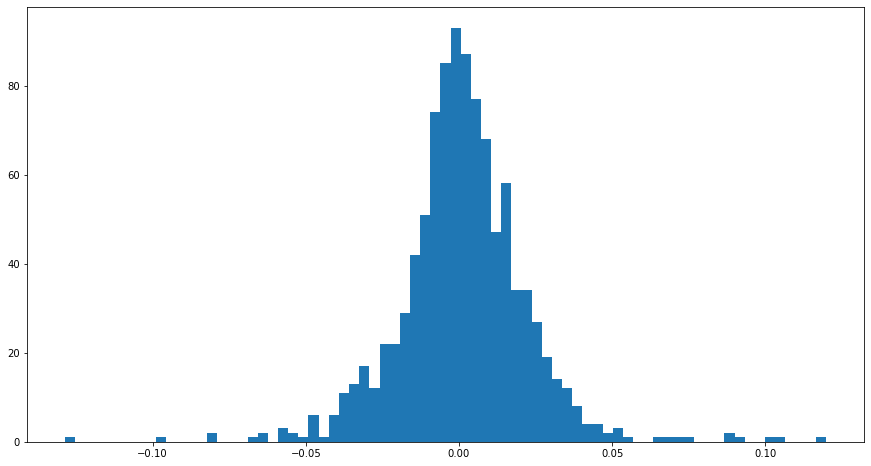

In [33]:
plt.hist(df.daily_returns, bins=75)
plt.show()

**Step 4**

Now, you need to compute the mean and standard deviation of the returns. You also need to compute the annualized average returns using the formula below:

$\text{Average Annualized Return} = ( ( 1 + \mu ) ^ {252}) - 1$

Standard deviation for T time period can be computed using the following formula:

$\sigma_{annual} = \sigma_{daily} * \sqrt{T}$

Follow these steps:
1. Compute the average daily returns and the annualized returns.
2. Compute the standard deviation of the returns and the annualized volatility.
3. Compute the annualized variance.
4. Compute the skewness and kurtosis of the returns.

In [34]:
# Daily and annualized mean returns
av_daily_rets = np.mean(df.daily_returns)
av_annual_rets = (1 + av_daily_rets)**252 - 1

# Daily and annualized volatility
std_daily = np.std(df.daily_returns)
std_annualized = std_daily * np.sqrt(252)
print(
    f"The average daily returns are {av_daily_rets} and the annualized daily returns are {av_annual_rets}.")
print(
    f"The average standard deviation is {std_daily} and the annualized volatility is {std_annualized}.")

The average daily returns are 0.0010770452697790123 and the annualized daily returns are 0.31162830925071594.
The average standard deviation is 0.021056532048939987 and the annualized volatility is 0.33426208364973925.


In [35]:
# Annualized variance
daily_variance = std_daily**2
annualized_variance = std_annualized**2
print(
    f"The daily variance is {daily_variance} and the annualized variance is {annualized_variance}.")

The daily variance is 0.0004433775419280368 and the annualized variance is 0.11173114056586528.


**HINT**: 
- You can use the np.mean() and np.std() functions to compute the mean and standard deviation of the returns.
- You can compute the annualized std by multiplying the daily std with the square root of 252.
- You can compute the annualized variance by squaring the annualized std.

Compute the skewness and excess kurtosis of returns using the **skew()** and **kurtosis()** functions from the **scipy.stats** library. 
Note: You need to add the necessary imports here.

In [36]:
'''
Add the code to compute the skewness and kurtosis of returns here.
'''

# Compute skewness
from scipy.stats import skew

skewness = skew(df.daily_returns)
print(f"The skewness of the daily returns is {skewness}.")

The skewness of the daily returns is 0.09454826489064659.


In [37]:
# Compute excess kurtosis
from scipy.stats import kurtosis

kurtosis = kurtosis(df.daily_returns)
print(f"The excess kurtosis of the daily returns is {kurtosis}.")

The excess kurtosis of the daily returns is 4.942169677435645.


**HINT**: 
- This is the syntax: scipy.stats.skew(_Returns column_). Remember to drop the null values.
- This is the syntax: scipy.stats.kurtosis(_Returns column_). Remember to drop the null values.
    

**Step 5**

Check the normality of the stock returns distribution using the **Shapiro-Wilk test**. You can use the **shapiro()** function from the **scipy.stats** library.

The function will return two values- the first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to assess the normality of the data. If the p-value is less than or equal to 0.05, you can  reject the null hypothesis of normality and assume that the data are non-normally distributed.

In [38]:
# Import the shapiro function from the scipy.stats library
from scipy.stats import shapiro

# Compute the p_value by running the shapiro function on the returns column
p_value = shapiro(df.daily_returns)[1]

# Print the results
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.




---


### **Section 3: Historical VaR and C-VaR (Expected shortfall)**

Value at Risk (VaR) is the maximum loss that one will not exceed with a certain probability α within a given time horizon. It is given as a threshold with a given confidence level that losses will not exceed a that level.

Conditional Value at Risk (CVaR), or Expected Shortfall, is an estimate of
expected losses sustained in the worst 1 - x% of scenarios.

**Step 1**
1. Define the parameter for the confidence level for the VaR (say, 95).
2. Compute the historical VaR.
3. Compute the historical CVaR.

The historical VaR(95) is -3.239807675939488.


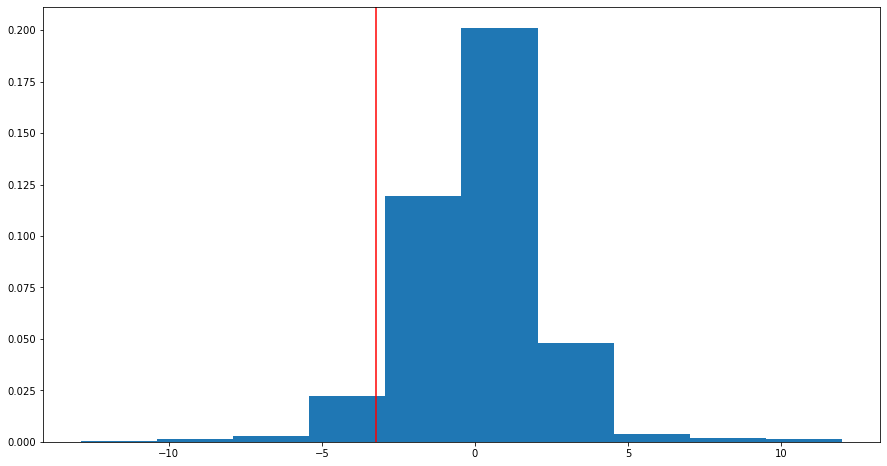

In [39]:
# Define the var level parameter
var_level = 95

rets_percent = df.daily_returns*100

# Compute and print the historical VaR
var_95 = np.percentile(rets_percent, 100 - var_level)
print(f"The historical VaR(95) is {var_95}.")

# Sort the returns for plotting
sorted_rets = sorted(rets_percent)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Draw a vertical line in the plot for the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

**HINT**: You need to use the np.percentile() function. Remember, that you need to compute the lower 5% percentile for VaR(95).

**Step 2**

Compute the expected shortfall (CVaR) and plot the results.

The historical CVaR(95) is -4.668708150616437.


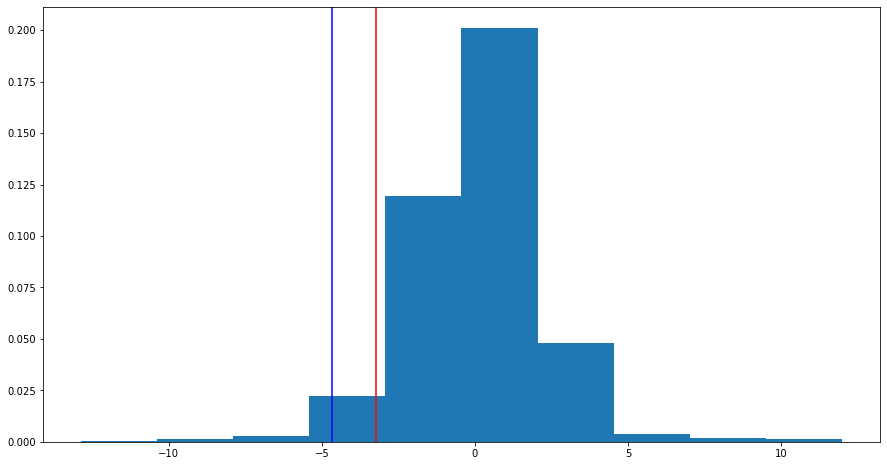

In [40]:
# Compute and print the expected shortfall
cvar_95 = rets_percent[rets_percent < var_95].mean()
print(f"The historical CVaR(95) is {cvar_95}.")

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, stacked=True)

# Draw vertical lines in the plot for the VaR 95 and CVaR quantiles
plt.axvline(x=var_95, color='r', linestyle='-',
            label="VaR 95: {0:.2f}%".format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-',
            label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

**HINT**: For expected shortfall, you need to take a mean of the returns lower than the VaR(95).



---



### **Section 4: Parametric VaR and C-VaR (Expected shortfall)**


The **parametric method VAR** (also known as **Variance/Covariance VAR**) calculation is another commonly used form of VaR calculation. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values.


You can use the norm.ppf() function from the scipy.stats library for this. You have already computed the mean and standard deviation of the returns earlier.

In [41]:
# Import the necessary library
from scipy.stats import norm

# Set the parameters
#mu = av_daily_rets
#vol = std_daily
mu = np.mean(rets_percent)
vol = np.std(rets_percent)

# Set the confidence level for VaR(95)
var_level = 95
confidence_level = (100 - var_level)/100
print(f"Confidence level is {confidence_level}.")

# Calculate the parametric VaR(95)
pvar_95 = norm.ppf(confidence_level, mu, vol)
print(f"The parametric VaR(95) is {pvar_95}.")

# Calculate the parametric CVaR(95)
p_cvar_95 = rets_percent[rets_percent < pvar_95].mean()
print(f"The historical CVaR(95) is {p_cvar_95}.")

Confidence level is 0.05.
The parametric VaR(95) is -3.3557867841939886.
The historical CVaR(95) is -4.818428214480166.


**HINT**:  You can compute parametric VaR(90) using norm.ppf(confidence_level=0.10, mu, vol).

---



# Section 5: Scaling the VaR

The VaR calculated in the previous sections is simply the value at risk for a single day. To estimate the VaR for a longer time duration, scale the value by the square root of time, similar to scaling volatility.

The formula for this is:

 $\text{VaR}_{\text{t days}} = \text{VaR}_{\text{1 day}} * \sqrt{t}$


 Using the above formula, let us see how VaR increases over the time for a period of an year.

 Follow these steps:

 1. Create an empty 2-d array of shape 252x2.
 2. In a for loop, iterate through all the values of days (1-252) and add the time to the first column of the array.
 3. Add the value of VaR for that time period to the second column of the array.
 4. Plot the results by passing the array to the function plot_var() defined below.

In [42]:
def plot_var(array):
    d = pd.DataFrame(abs(array))
    d[1].plot(xlabel='Time', ylabel='Forecasted VaR-95',
              title="Time scaled VaR")
    plt.show()

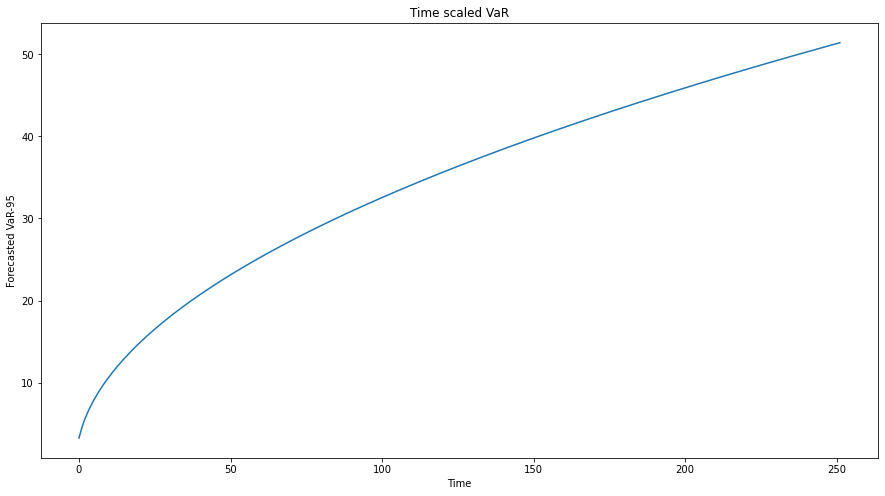

In [43]:
# Create an empty array to contain the VaR values
VaR_arr = np.empty([252, 2])

# Loop through the time period
for i in range(252):
    VaR_arr[i, 0] = i
    VaR_arr[i, 1] = var_95*np.sqrt(i+1)

# Plot the results
plot_var(VaR_arr)

**HINT**: VaR(t)= _VaR computed above_ * np.sqrt(t).

### **Section 6: Monte Carlo simulations**

**Step 1**

Follow these steps:

1. Set the seed for the random number generator so that our results are reproducible.
2. Initialize the parameter (n) for the number of simulations. Here, we will run 1000 simulations.
3. Start a for loop for the values 0 to n.
4. Simulate the random returns for using the mean and std of the daily returns for T time period. We will simulate for a year (T=252).
5. Compute the VaR(95) and cVaR(95).
6. Plot the simulations.


In [44]:
'''
Add the code for section 6 here
'''
# Set the seed
np.random.seed(2022)

# Initialize the parameters
mu = av_daily_rets
vol = std_daily
n_sims = 1000
T = 252
sim_returns = []

# Loop through the number of simulations
for i in range(n_sims):

    # Generate the Random Walk using the mu, vol computed above
    rand_rets = np.random.normal(mu, vol, T)

    # Save the results
    sim_returns.append(rand_rets)

# Calculate and print the VaR(95)
mc_var_95 = np.percentile(sim_returns, 5)
print("VaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_var_95, 2), "%")

VaR(95) computed from the Monte Carlo Simulations:  -3.35 %


In [45]:
# Define a function to convert the list of lists for simulations to a single list
def flatten(listoflists):
    return [item for sublist in sim_returns for item in sublist]

In [46]:
# Convert our list of simulations into a pandas series of simulated values
sims = pd.Series(flatten(sim_returns))
len(sims)

252000

In [47]:
sims.shape

(252000,)

In [48]:
sims[sims < mc_var_95]

11       -0.047478
24       -0.039792
48       -0.033678
69       -0.061196
102      -0.041341
            ...   
251939   -0.045155
251952   -0.037295
251953   -0.044062
251954   -0.037227
251989   -0.040876
Length: 12600, dtype: float64

In [49]:
mc_cvar_95 = sims[sims < mc_var_95].mean()
print("CVaR(95) computed from the Monte Carlo Simulations: ",
      round(100*mc_cvar_95, 2), "%")

CVaR(95) computed from the Monte Carlo Simulations:  -4.24 %


**HINT**:
- random_rets = np.random.normal(mean, std, T). Append the simulations to a list.
- var(90) = np.percentile(_simulations list_, 10).

**Step 2**

Simulate the prices using Monte Carlo simulations.

In [50]:
# Initialize the parameters

# Starting price
one_year_back = dt.date(end.year - 1, end.month, end.day)

df1 = yf.download(ticker, start, end)
prices = df1['Adj Close']
prices.head()

[*********************100%***********************]  1 of 1 completed


Date
2020-02-18    77.780159
2020-02-19    78.906609
2020-02-20    78.097107
2020-02-21    76.329399
2020-02-24    72.703712
Name: Adj Close, dtype: float64

In [51]:
prices.iloc[0]

77.78015899658203

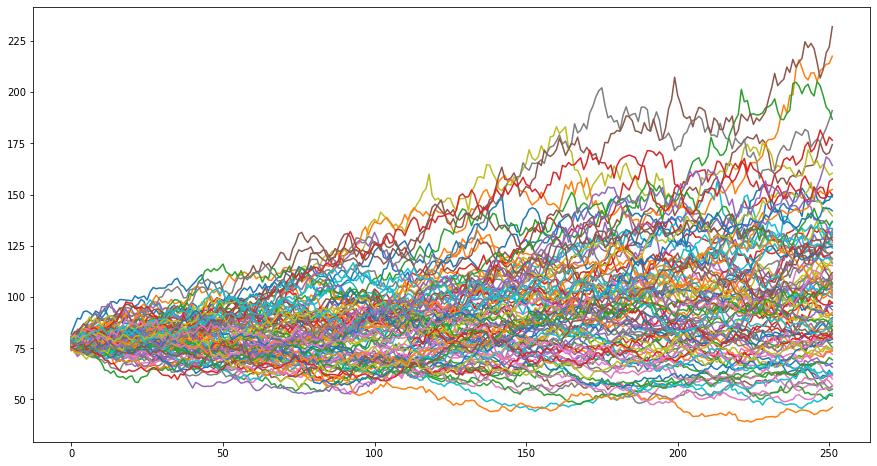

In [52]:
s0 = prices.iloc[0]
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1

    # Create the Monte carlo path
    forecasted_values = s0*(rand_rets).cumprod()

    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()